<h1>ACTIVITY 2</h1>
<h2>Car Accident Data Analytics (United Kingdom)</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

data = pd.read_csv("datasets\\uk_accident_data.csv")

<h2>Analyzing the dataframe</h2>

In [2]:
data.value_counts()

Index          Accident_Severity  Accident Date  Latitude   Light_Conditions        District Area       Longitude  Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  Road_Type           Urban_or_Rural_Area  Weather_Conditions     Vehicle_Type         
2.01E+12       Slight             12/02/2021     51.067126  Darkness - no lighting  Sedgemoor           -3.023829  1                     1                   Dry                      Dual carriageway    Rural                Fine no high winds     Car                      2
                                  22/11/2020     52.624184  Darkness - no lighting  Broadland            1.372570  1                     2                   Snow                     Dual carriageway    Rural                Snowing no high winds  Car                      2
                                  31/10/2020     55.003273  Darkness - no lighting  North Tyneside      -1.490457  1                     2                   Wet or damp              Dual

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
data['Accident Date'] = data['Accident Date'].str.strip()
data['Accident Date'] = data['Accident Date'].astype('str')
data['Accident Date'] = data['Accident Date'].str.replace('/', '-')

In [5]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')

In [6]:
data.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [7]:
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['Day'] = data['Accident Date'].dt.day
data['DayOfWeek'] = data['Accident Date'].dt.dayofweek

<h2>Identify Null Values</h2>

In [8]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

<h2>Cleaning the Null Values</h2>

In [9]:
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna(data['Road_Type'].mode()[0])
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Weather_Conditions'] = data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0])

In [10]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h2>Example: Univariate Analysis on accident that happened in 2019</h2>

In [11]:
df_2019 = data[data['Year'] == 2019]

In [12]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1>ACTIVITY 2</h1>

<H2>1. What weather condition does classsified has the most chance of fatality?</H2>

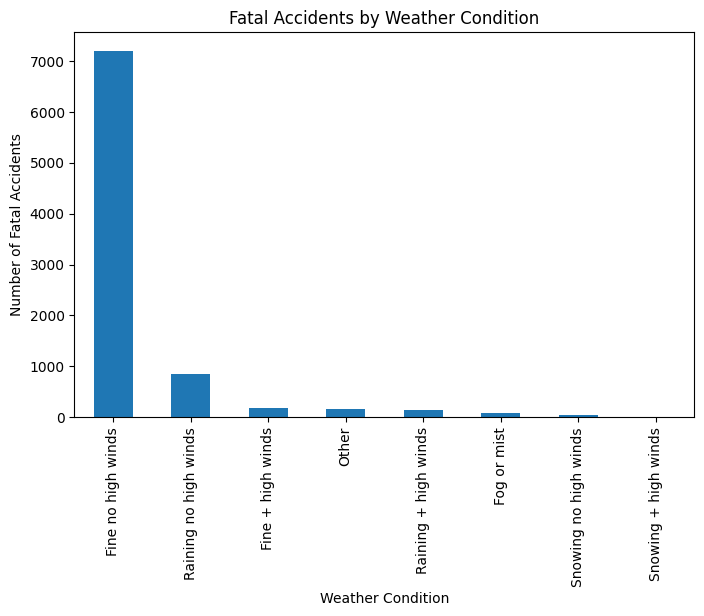

In [13]:
accident_fatal = data[data['Accident_Severity'] == "Fatal"]
fatal_weather = accident_fatal['Weather_Conditions'].value_counts()
fatal_weather.plot(kind='bar', figsize=(8,5))
plt.title("Fatal Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=90)

plt.show()

<h4>Q1 INSIGHT: Based on the data presented. "Fine no high winds" has the most amount chance of fatality. It can be possible due to being it is the most common weather condition overall, stating that other factors might have been the cause of fatal accidents. Concluding that Fine no winds might not be a credible factor in terms of the severity of accidents. Although other category inside the factor such as Fog, Snowing, High Winds has a higher contribution on those fatal accidents.</h4>

<h3>2. What other factor have caused fatal accidents?</h3>

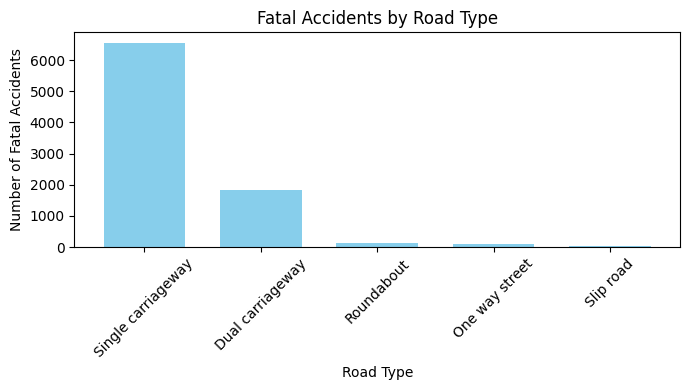

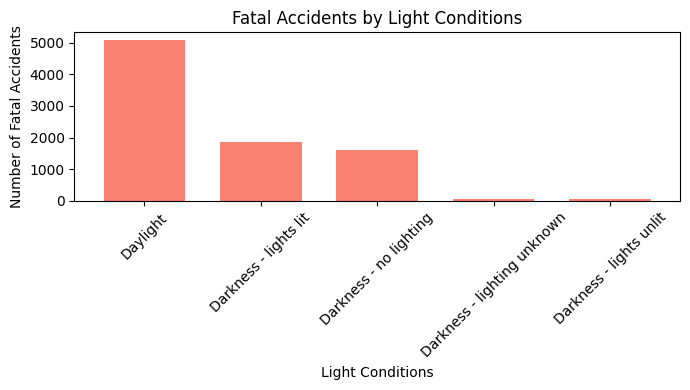

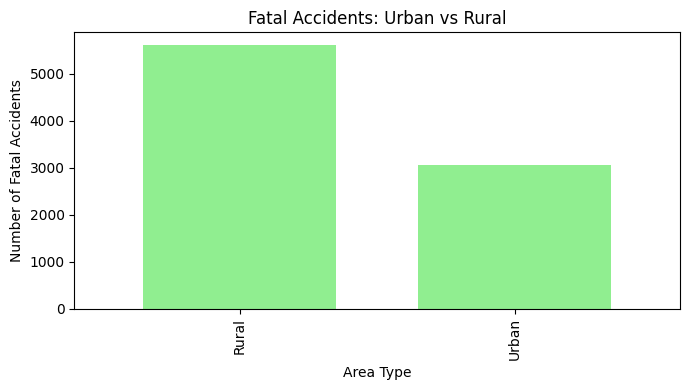

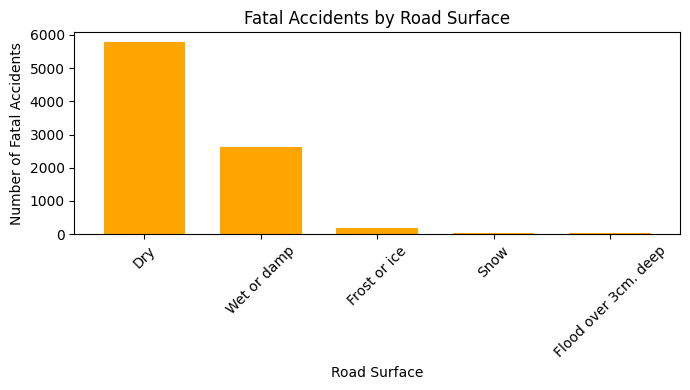

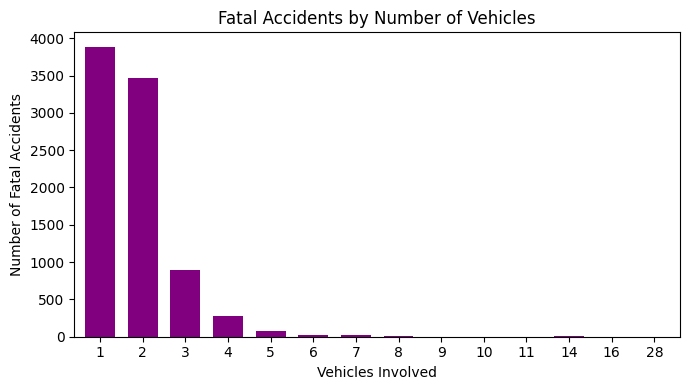

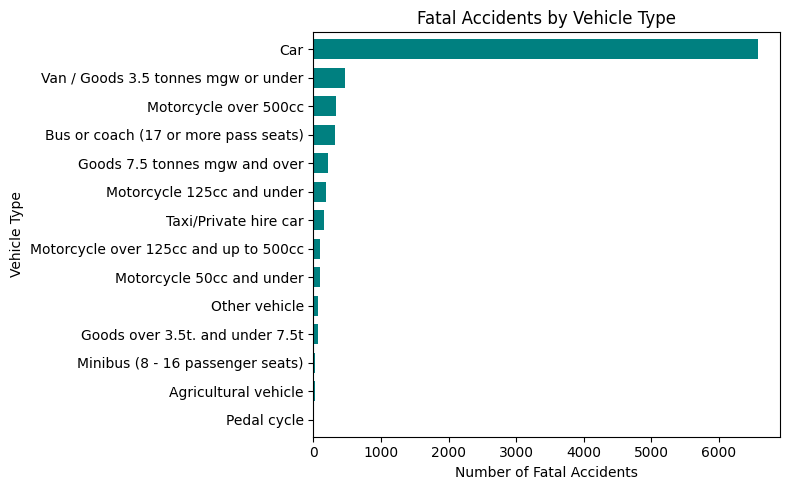

In [14]:
road_counts = accident_fatal['Road_Type'].value_counts()
road_counts.plot(
    kind='bar',
    figsize=(7,4),
    width=0.7,
    color='skyblue'
)
plt.title("Fatal Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Light Conditions
light_counts = accident_fatal['Light_Conditions'].value_counts()
light_counts.plot(
    kind='bar',
    figsize=(7,4),
    width=0.7,
    color='salmon'
)
plt.title("Fatal Accidents by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Urban vs Rural
area_counts = accident_fatal['Urban_or_Rural_Area'].value_counts()
area_counts.plot(
    kind='bar',
    figsize=(7,4),
    width=0.7,
    color='lightgreen'
)
plt.title("Fatal Accidents: Urban vs Rural")
plt.xlabel("Area Type")
plt.ylabel("Number of Fatal Accidents")
plt.tight_layout()
plt.show()

# 4. Road Surface
surface_counts = accident_fatal['Road_Surface_Conditions'].value_counts()
surface_counts.plot(
    kind='bar',
    figsize=(7,4),
    width=0.7,
    color='orange'
)
plt.title("Fatal Accidents by Road Surface")
plt.xlabel("Road Surface")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Number of Vehicles
vehicles_counts = accident_fatal['Number_of_Vehicles'].value_counts().sort_index()
vehicles_counts.plot(
    kind='bar',
    figsize=(7,4),
    width=0.7,
    color='purple'
)
plt.title("Fatal Accidents by Number of Vehicles")
plt.xlabel("Vehicles Involved")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Vehicle Type (horizontal bars, largest on top)
vehicle_type_counts = accident_fatal['Vehicle_Type'].value_counts()

vehicle_type_counts.iloc[::-1].plot(
    kind='barh',
    figsize=(8,5),
    width=0.7,
    color='teal'
)
plt.title("Fatal Accidents by Vehicle Type")
plt.xlabel("Number of Fatal Accidents")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()



<h4>Q2 INSIGHT1: The total fatal accident cases recorded is 8661. Categorized on different factors, here are the summarizization of highest fatal accidents on each category:<h4>
<p>-Road Type: Single Carriageway</p>
<p>-Light Condition: Daylight</p>
<p>-Urban vs Rural: Rural</p>
<p>-Road Surface: Dry</p>
<p>-Number of Vehicles Involved: 1</p>
<p>-Vehicle Type: Car</p>

<h4>Q2 INSIGHT2: Almost all of the fatality count on each factor are close to each other. And the category with the highest fatal counts in each factor is the most common in terms of regular scenarios.</h4>

<h4>Q2 INSIGHT3: The Dry Road Surface covering cannot be considered the high causes of fatality because being in dry condition means there is enough grip of the tire on the surface, making the driver have the control of the car. The wet or damp road surface contributed about half of the amount of the dry surface has a higher role of causing fatality because there is less control of the driver because of wet surface. There is a possibility that the car tire condition is also the cause of the fatal accidents.<h4>

<h4>Q2 INSIGHT4: Single Carriageway Road Type has a high chance of being the culprit of fatal accidents. Not just being the 76% of 6560 on the Road Type factor but it is also because of the opposite direction lanes are next to each other without any protections and can cause collisions on the opposite lanes. It is also the most common road type overall resulting on high chance of fatality.</h4>

<h4>Q2 INSIGHT5: Light Conditions have a role on causing those fatal accidents, but not too much because based on the record, Daylight still covered 59% of 8661 recorded. The Darkness with light and No light is the second contributing cause of fatality in the category which is common, because visibility greatly contribute to the safety in terms of driving</h4>

<h4>Q2 INSIGHT6: In terms of the area where the accident happen, Rural is higher than Urban covering 65%, and it has a high role in causing Fatal Accidents. This might be because in Urban areas, there are many vehicles and traffic resulting of the drivers being more aware of their surroundings. As for Rural areas, there is few to medium amount of vehicle reasoning for the drivers to be more too-comfortable on their driving, decreasing their awareness and increasing their speed more.</h4>

<h4>Q2 INSIGHT7: In terms of Number of Vehicles, "One" vehicle involved is the highest in the record but "2" is also the second high contributing on fatal accident. It is common for a single vehicle only involved because of collisions to trees, other structures, and being at high speed. 2 Vehicles colliding with each other at high speed can also result in a Fatal accident.  </h4>

<h4>Q2 INSIGHT8: Car category in Vehicles covering 75% is common because most people drive cars. But some of those cars might have collided on different type of vehicle such as trucks decreasing the probability of survival.</h4>

<h2>Q3. In all the years, what month has the highest case of accident in terms of average?</h2>

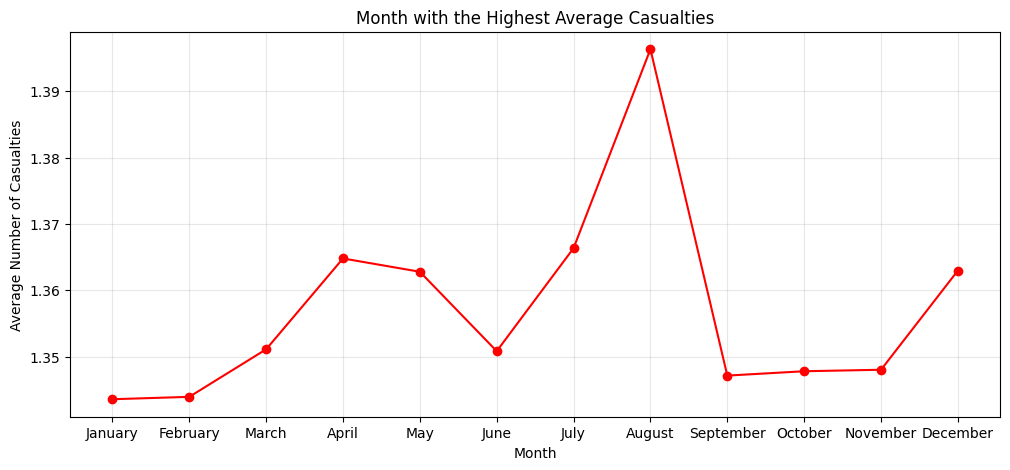

In [15]:
monthly_avg_cas = data.groupby('Month')['Number_of_Casualties'].mean()

monthly_avg_cas.plot(
    marker='o',
    figsize=(12,5),
    title='Month with the Highest Average Casualties',
    color='red'
)
plt.xticks(
    range(1,13),
    ['January','February','March','April','May','June','July',
     'August','September','October','November','December']
)
plt.xlabel("Month")
plt.ylabel("Average Number of Casualties")
plt.grid(alpha=0.3)
plt.show()

In [16]:
monthly_avg_cas = data.groupby('Month')['Number_of_Casualties'].mean()
monthly_avg_cas

Month
1     1.343585
2     1.343941
3     1.351107
4     1.364796
5     1.362791
6     1.350826
7     1.366350
8     1.396324
9     1.347144
10    1.347801
11    1.348024
12    1.362972
Name: Number_of_Casualties, dtype: float64

<h4>Q3 INSIGHT: Based on the data the highest average casualties in terms of the month of each years is August reaching nearly 1.40 with January being the Lowest.</h4>

<h2>Q4. In all the years, what month has the highest case of serious and fatal accident?</h2>

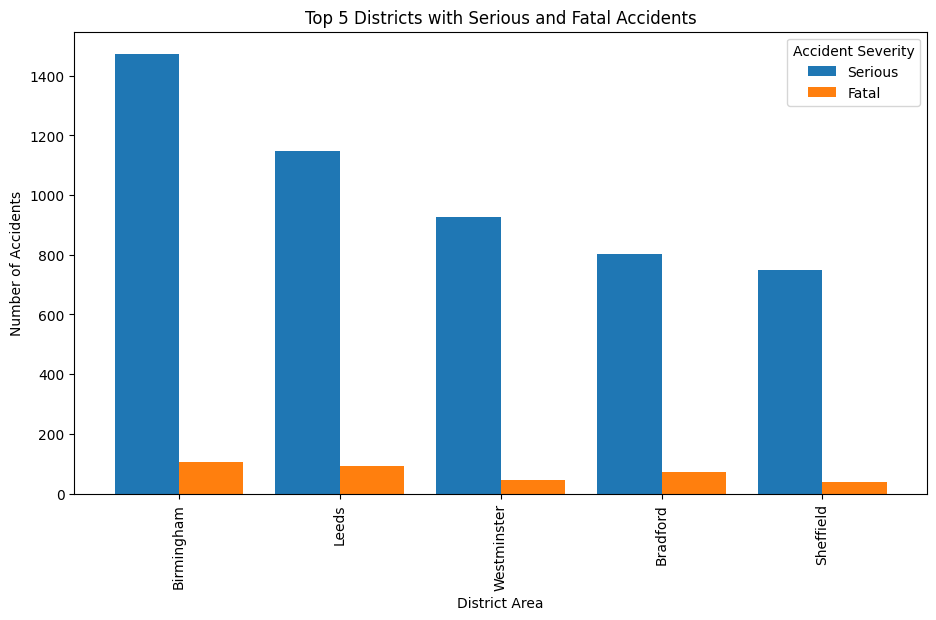

In [26]:
df = data.groupby(['District Area','Accident_Severity']).size().unstack()

df = df[['Serious','Fatal']]

top5 = df.sum(axis=1).nlargest(5).index
df_top5 = df.loc[top5]

# Plot
df_top5.plot(
    kind='bar',
    figsize=(11,6),
    width=0.8
)
plt.title('Top 5 Districts with Serious and Fatal Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


<h4>Q4 INSIGHT1: According to the data, the district with highest case of serious and fatal accident is Birmingham reaching above 1400, with Leeds on the second having nearly 1000. This might be the cause of heavy traffic, speeding, and dangerous driving, along with roads that are not always safe for pedestrians, cyclists, and motorcyclists.</h4>

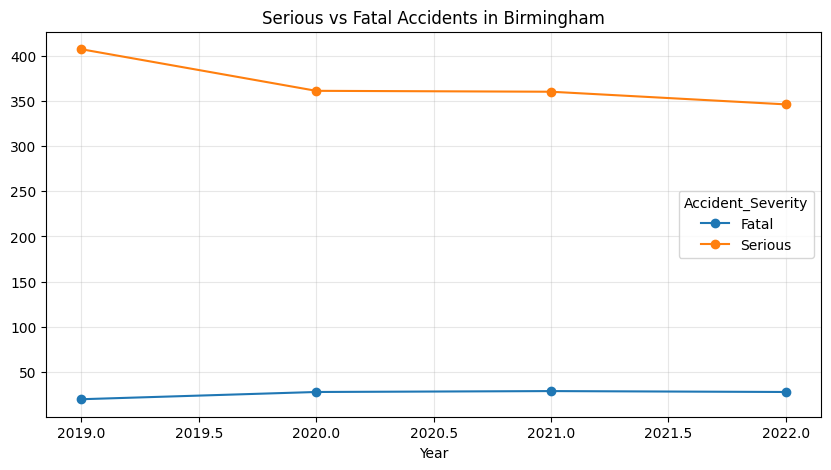

In [18]:

serious_fatal = data[
    (data['Accident_Severity'] == 'Serious') | 
    (data['Accident_Severity'] == 'Fatal')
]

district_counts = serious_fatal['District Area'].value_counts()
top_district = district_counts.idxmax()

district_data = serious_fatal[serious_fatal['District Area'] == top_district]
yearly_severity = district_data.groupby(['Year', 'Accident_Severity'])['Index'].count()

yearly_severity = yearly_severity.unstack(level=1)

yearly_severity.plot(
    marker='o',
    figsize=(10, 5),
    title='Serious vs Fatal Accidents in Birmingham'
)
plt.grid(alpha=0.3)
plt.show()


<h4>Q4 INSIGHT2: This are the further analysis of the top district which holds the highest serious and fatal accidents. Based on the data above, the peak amount serious accident was on 2019 but starts declining within half a year, while the fatal accidents start increasing on mid 2019. The reaason of the declined amount must be the city implemented safety laws in driving to lessen the chance of accidents.</h4>

<h2>Q5. Are serious and fatal accidents more common in multi-vehicle or single-vehicle cases?</h2>


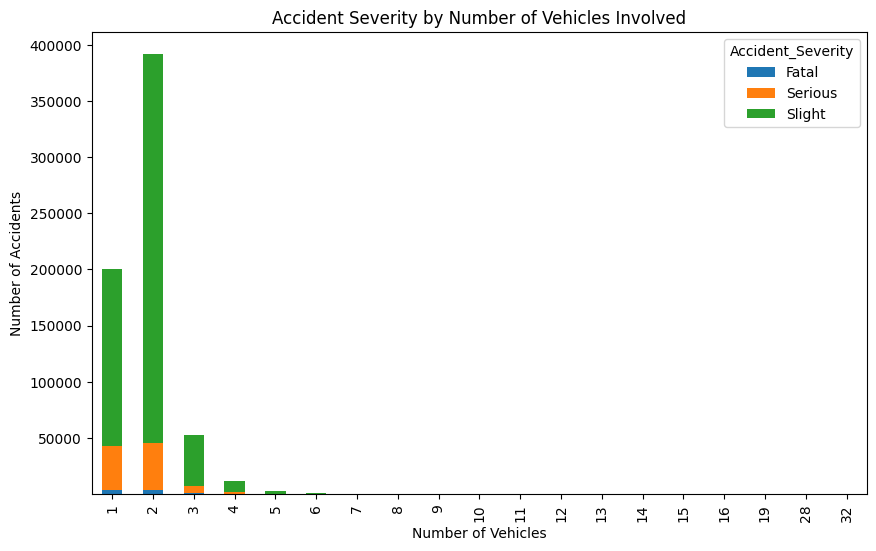

In [19]:
multi_vehicle = data.groupby(['Number_of_Vehicles','Accident_Severity']).size().unstack(fill_value=0)
multi_vehicle.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Accident Severity by Number of Vehicles Involved")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Accidents")
plt.show()


<h4>Q5 INSIGHT: Based on the data, the margin of the serious and fatal accidents are close in single and two vehicles involved. The reason might be Single and Two vehicles involvement are the most common accident. But in terms of slight severity, two vehicles involved have higher number than single.</h4>

<h2>Q6. Are road surface conditions linked differently to accidents in urban vs rural areas?</h2>


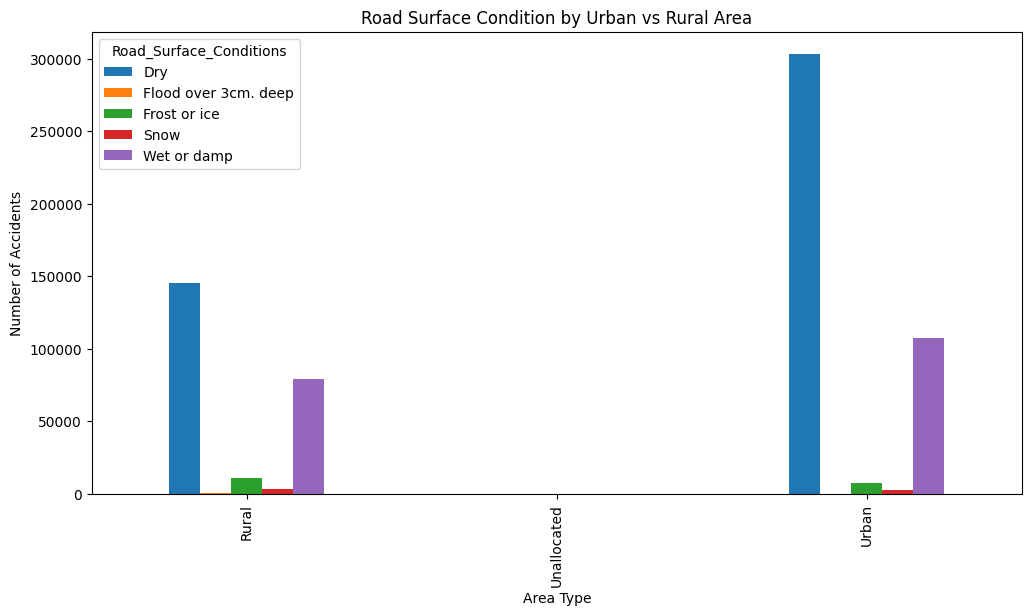

In [20]:
surface_area = data.groupby(['Urban_or_Rural_Area','Road_Surface_Conditions']).size().unstack(fill_value=0)
surface_area.plot(kind='bar', figsize=(12,6))
plt.title("Road Surface Condition by Urban vs Rural Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.show()


<h4>Q6 INSIGHTS: The data showed that the surface conditions on the both areas showed identical results, although the Rural has sa lower number of accidents. This means that Urban areas still produce more accidents than rural areas in this case. This result might be because of the population count and traffic density difference in Rural and Urban areas.</h4>

<h2>Q7. Is there any changes on the number of accidents each year?</h2>
yearly_accidents = data.groupby('Year').size()



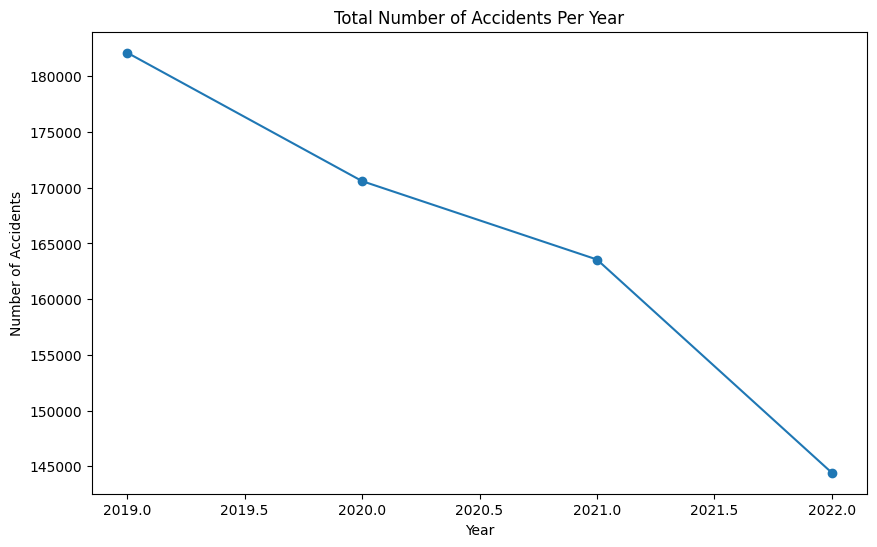

Year
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

In [21]:
yearly_accidents = data.groupby('Year').size()
yearly_accidents.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Total Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()
yearly_accidents

<h4>Q7 INSIGHTS: The data presented that there is a significant difference in terms of the amount of accidents in each year. The graph shows, that 2019 have the highest recorded accidents reaching 182000, and it started declining significantly, and a slight slower decline rate between 2020 and 2021. On 2022 the number has declined to 144000.</h4>

<h2>Q8. Is there any difference in the number of accidents between weekdays and weekends in rural and urban areas?</h2>


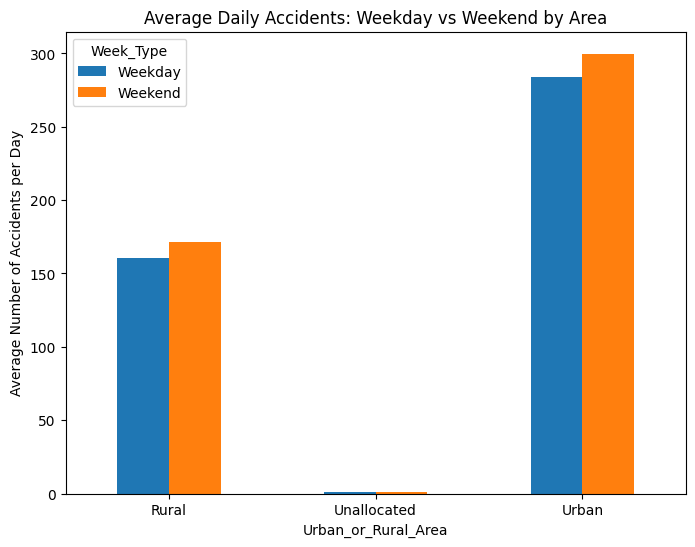

Week_Type,Weekday,Weekend
Urban_or_Rural_Area,,
Rural,160.481801,171.335731
Unallocated,1.000000,1.000000
Urban,284.146552,299.829736


In [25]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], errors='coerce')
data['Day_of_Week'] = data['Accident Date'].dt.dayofweek
data['Week_Type'] = np.where(data['Day_of_Week'] >= 5, 'Weekend', 'Weekday')
daily_counts = data.groupby(['Urban_or_Rural_Area','Week_Type','Accident Date']).size().reset_index(name='Accidents')
avg_daily = daily_counts.groupby(['Urban_or_Rural_Area','Week_Type'])['Accidents'].mean().unstack()


avg_daily.plot(kind='bar', figsize=(8,6))
plt.title("Average Daily Accidents: Weekday vs Weekend by Area")
plt.ylabel("Average Number of Accidents per Day")
plt.xticks(rotation=0)
plt.show()

avg_daily



<h4>Q8 INSIGHTS: While urban areas record far more average accidents overall, the ratio of weekday to weekend accidents is almost the same as in rural areas, with both showing a slight increase in accidents on weekends.”</h4>

<h2>Q9. Is there any noticeable changes in severity of accidents based on the light conditions?</h2>

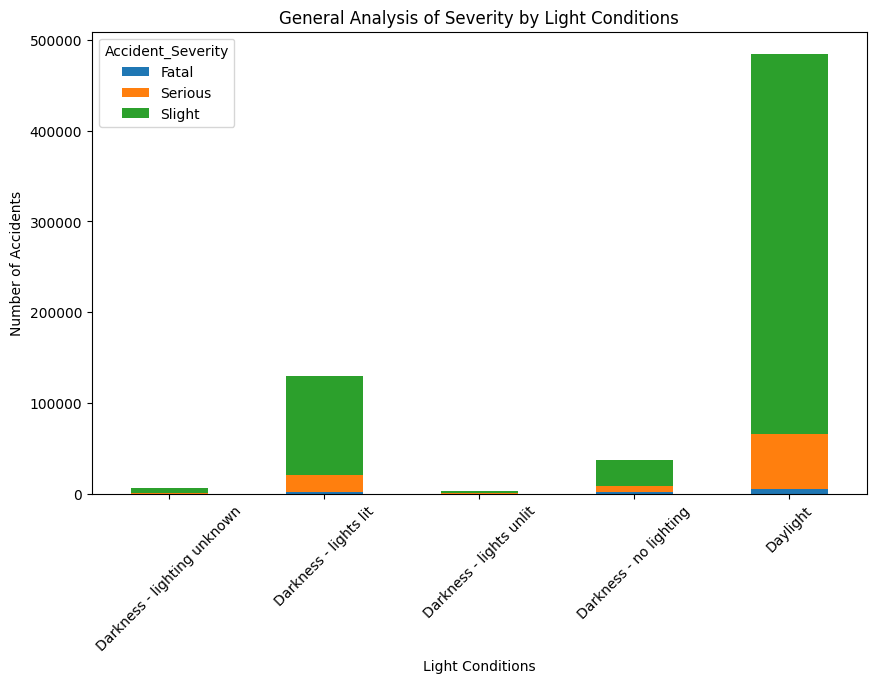

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


In [23]:
light_severity = data.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

light_severity.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("General Analysis of Severity by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

light_severity


<h4>Q9 INSIGHTS: Most accidents happen in daylight, but accidents in dark conditions without proper lighting are more severe. This suggests that poor visibility at night increases the likelihood of serious and fatal accidents, even though the total number of crashes is smaller.</h4>

<h2>Q10. How does accident frequency on wet or icy roads change throughout the year?</h2>

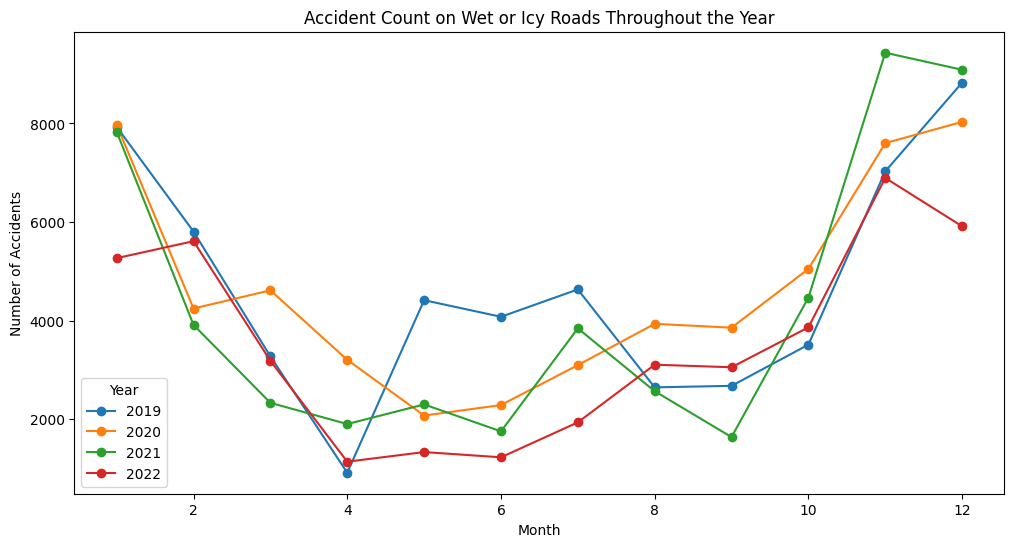

Year,2019,2020,2021,2022
Month,,,,
1,7930,7968,7830,5266
2,5805,4244,3911,5610
3,3272,4613,2330,3182
4,912,3203,1900,1136
5,4413,2072,2298,1331
6,4076,2285,1751,1225
7,4631,3095,3841,1934
8,2644,3933,2566,3104
9,2675,3855,1635,3052


In [31]:

data['Accident Date'] = pd.to_datetime(data['Accident Date'], errors='coerce')

data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month

wet_icy = data[data['Road_Surface_Conditions'].isin(['Wet or damp', 'Frost or ice'])]

wet_icy_trend = wet_icy.groupby(['Year','Month']).size().reset_index(name='Accidents')

pivot_trend = wet_icy_trend.pivot(index='Month', columns='Year', values='Accidents')

pivot_trend.plot(figsize=(12,6), marker='o')
plt.title("Accident Count on Wet or Icy Roads Throughout the Year")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Year")
plt.show()
pivot_trend


<h4>Q10 INSIGHTS1: According to the data, there are some differences in the number of accidents on wet and icy roads through the past years. But they still follow the normal pattern, which is that most accidents happen at the start of the year in January because it is winter season in the UK, when roads are colder, icier, and more dangerous. As the months go by, accidents go down a little because the ice gradually melts. Then toward the end of the year, accidents rise again because of bad weather, starting of the winter season, and more cars on the road during the holidays.</h4>

<h4>Q10 INSIGHTS2: According to the data, the number of accidents is at its lowest from April to August in most of the years. This shows that late spring and summer have safer road conditions compared to winter months. But in some years like 2019 and 2021, there are still small increases around June and July, which may be caused by heavy rain or sudden bad weather.</h4>

<h2>Q11. Does the increase of vehicles within the past years, also increased the number of accidents?</h2>

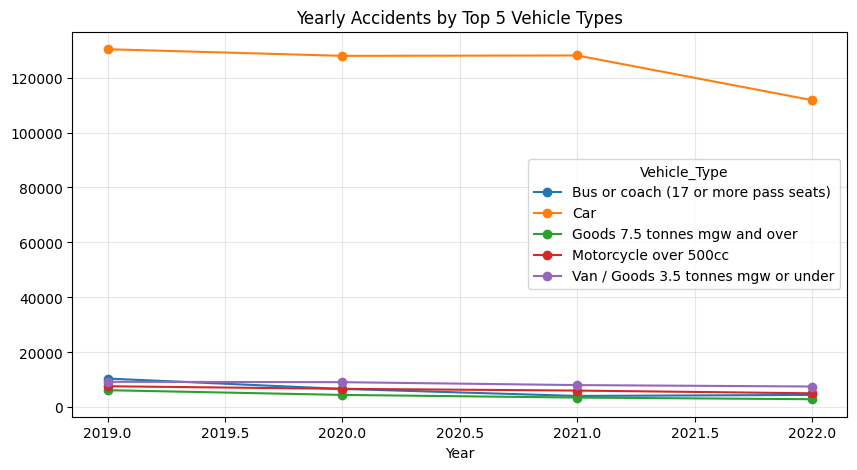

Vehicle_Type,Bus or coach (17 or more pass seats),Car,Goods 7.5 tonnes mgw and over,Motorcycle over 500cc,Van / Goods 3.5 tonnes mgw or under
Year,,,,,
2019,10483,130304,6247,7686,9303
2020,6709,127894,4528,6745,9162
2021,4155,128026,3569,6110,8106
2022,4531,111768,2963,5116,7589


In [34]:
data['Year'] = pd.to_datetime(data['Accident Date'], errors='coerce').dt.year
top5_types = data['Vehicle_Type'].value_counts().nlargest(5).index
yearly_dataxx = data[data['Vehicle_Type'].isin(top5_types)].groupby(['Year', 'Vehicle_Type'])['Index'].count()
yearly_dataxx = yearly_dataxx.unstack(level=1)
yearly_dataxx
yearly_dataxx.plot(
    marker='o', 
    figsize=(10, 5),
    title='Yearly Accidents by Top 5 Vehicle Types'
)
plt.grid(alpha=0.3)
plt.show()
yearly_dataxx


<h4>Q11 INSIGHTS1: According to the data above, cars always have the highest number of accidents compared to other vehicle types, reaching more than 110,000 cases each year. On the other hand, buses, motorcycles, vans, and goods vehicles stayed below 15,000 cases each year. This shows that cars are the main culprit or involved in accidents, not only because they are the most common but also because they are used more often on the roads by residents.</h4>

<h4>Q11 INSIGHTS2: According to the data, even if the number of cars in the UK went back to 2019 levels in 2022, the number of car accidents still went down. In 2019 there were 133,004 car accidents, but in 2022 it only reached 111,768. This means that more cars on the road did not always lead to more accidents, maybe because of safer driving, new habits after the pandemic, or stricter road rules.</h4>

<h4>Q11 INSIGHTS3: According to the data, at the start of 2021 the number of accidents for buses, goods vehicles, and motorcycles went down a lot because of the lockdown in the UK. Bus accidents dropped from 6,709 in 2020 to only 4,155 in 2021, and motorcycle accidents also went down. But car accidents stayed almost the same, which shows that people still used private cars more than public transport during that time.</h4>

<h2>Q12. Does accident severity correlate with road type?</h2>

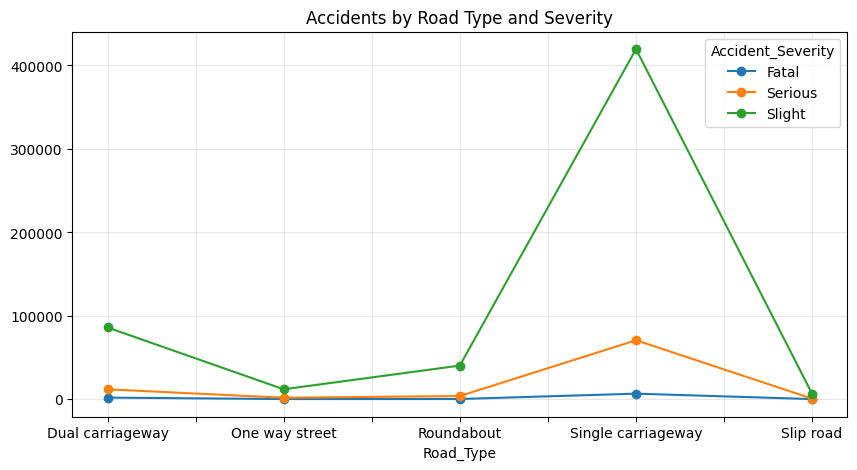

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6560,70540,419563
Slip road,49,611,6381


In [36]:
roadtype_dataxx = data.groupby(['Road_Type', 'Accident_Severity'])['Index'].count()
roadtype_dataxx = roadtype_dataxx.unstack(level=1)
roadtype_dataxx
roadtype_dataxx.plot(
    marker='o',
    figsize=(10, 5),
    title='Accidents by Road Type and Severity'
)
plt.grid(alpha=0.3)
plt.show()
roadtype_dataxx


<h4>Q12 INSIGHT1: Single carriageways have the highest number of accidents in all severity levels, with more than 400k slight accidents and 65k fatal accidents, making them the riskiest road type overall.</h4>  

<h4>Q12 INSIGHT2: Dual carriageways also show high accident counts, but the majority are slight accidents reaching 88000 compared to far fewer fatal (1800) or serious (11000) cases, suggesting they are safer than single carriageways.</h4>  

<h4>Q12 INSIGHT3: Roundabouts and slip roads record fewer accidents overall, but still show a noticeable number of slight accidents around 40000 on roundabouts and ~6k on slip roads), meaning even smaller road types contribute significantly to accident totals.</h4>  